# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

# Set GPU options
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Documentation Implementation**

Reading the Data

In [61]:
test_files = []
import string
def load_and_preprocess_data(dataset_path, image_size=(256, 256), subset_size=None, dataset_type='Unknown'):
   # Get all image files in the dataset_path directory and its subdirectories
    image_files = glob.glob(os.path.join(dataset_path, '**', '*.png'), recursive=True)
    if subset_size:
        image_files = image_files[:subset_size]
    images = []
    for i, img_path in enumerate(image_files):
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img)
        img_array = img_array / 255.0
        images.append(img_array)
       # Print a message after each batch is loaded
        if (i + 1) % 100 == 0:
            print(f"{dataset_type} Batch {i + 1} Loaded")

    images = np.array(images)
    return images


#Functions specifically designed for test images:
def load_and_preprocess_data_test(dataset_path, image_size=(256, 256), subset_size=None, dataset_type='Unknown'):
    image_files = glob.glob(os.path.join(dataset_path, '**', '*.png'), recursive=True)
    if subset_size:
        image_files = image_files[:subset_size]
    images = []
    # New list to store test image files
    for i, img_path in enumerate(image_files):
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img)
        img_array = img_array / 255.0
        images.append(img_array)
        if "test" in img_path.lower():
            test_files.append(img_path)  # Add the test image file to the list
        # Print a message after each batch is loaded
        if (i + 1) % 100 == 0:
            print(f"{dataset_type} Batch {i + 1} Loaded")

    images = np.array(images)
    return images, test_files  # Return both images and test image files



# Replace 'path_to_gtav_dataset' with your actual GTAV dataset path
gtav_path = '/kaggle/input/gta5-da/gta/images'

# Replace 'path_to_cityscape_dataset' with your actual Cityscape dataset path
cityscape_path_test = '/kaggle/input/cityscapes/Cityscape/leftImg8bit/test'
cityscape_path_train = '/kaggle/input/cityscapes/Cityscape/leftImg8bit/train'

# Load and preprocess a subset of Cityscape training dataset (e.g., first 1000 images)
cityscape_images_train = load_and_preprocess_data(cityscape_path_train, dataset_type='Cityscape Train', subset_size=1000)

# Load and preprocess a subset of Cityscape testing dataset (e.g., first 1000 images)
cityscape_images_test, cityscape_test_files = load_and_preprocess_data_test(cityscape_path_test, dataset_type='Cityscape Test', subset_size=1000)

# Load all images from GTAV dataset
gtav_images = load_and_preprocess_data(gtav_path, dataset_type='GTAV', subset_size=2000)

# Split GTAV dataset into training and testing sets
gtav_images_train, gtav_images_test = train_test_split(gtav_images, test_size=1000, random_state=42)

# Shuffle the datasets (optional)
cityscape_images_train = shuffle(cityscape_images_train, random_state=42)
cityscape_images_test = shuffle(cityscape_images_test, random_state=42)
gtav_images_train = shuffle(gtav_images_train, random_state=42)
gtav_images_test = shuffle(gtav_images_test, random_state=42)

# Print shapes and display sample images
print("Cityscape Training Images Shape:", cityscape_images_train.shape)
print("Cityscape Testing Images Shape:", cityscape_images_test.shape)
print("GTAV Training Images Shape:", gtav_images_train.shape)
print("GTAV Testing Images Shape:", gtav_images_test.shape)

Cityscape Train Batch 100 Loaded
Cityscape Train Batch 200 Loaded
Cityscape Train Batch 300 Loaded
Cityscape Train Batch 400 Loaded
Cityscape Train Batch 500 Loaded
Cityscape Train Batch 600 Loaded
Cityscape Train Batch 700 Loaded
Cityscape Train Batch 800 Loaded
Cityscape Train Batch 900 Loaded
Cityscape Train Batch 1000 Loaded
Cityscape Test Batch 100 Loaded
Cityscape Test Batch 200 Loaded
Cityscape Test Batch 300 Loaded
Cityscape Test Batch 400 Loaded
Cityscape Test Batch 500 Loaded
Cityscape Test Batch 600 Loaded
Cityscape Test Batch 700 Loaded
Cityscape Test Batch 800 Loaded
Cityscape Test Batch 900 Loaded
Cityscape Test Batch 1000 Loaded
GTAV Batch 100 Loaded
GTAV Batch 200 Loaded
GTAV Batch 300 Loaded
GTAV Batch 400 Loaded
GTAV Batch 500 Loaded
GTAV Batch 600 Loaded
GTAV Batch 700 Loaded
GTAV Batch 800 Loaded
GTAV Batch 900 Loaded
GTAV Batch 1000 Loaded
GTAV Batch 1100 Loaded
GTAV Batch 1200 Loaded
GTAV Batch 1300 Loaded
GTAV Batch 1400 Loaded
GTAV Batch 1500 Loaded
GTAV Batch 1

In [64]:
# Ensure that the datasets have the same number of samples
min_length = min(len(cityscape_images_train), len(gtav_images_train))
cityscape_images_train = cityscape_images_train[:min_length]
gtav_images_train = gtav_images_train[:min_length]
min_length = min(len(cityscape_images_test), len(gtav_images_test))
cityscape_images_test = cityscape_images_test[:min_length]
gtav_images_test = gtav_images_test[:min_length]

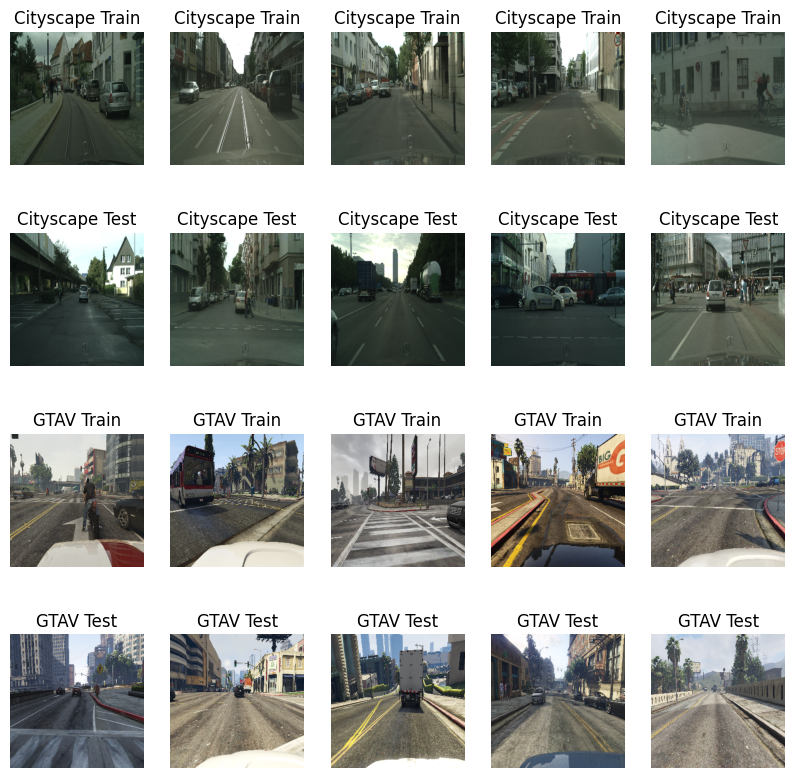

In [65]:
num_samples = 5
fig, axs = plt.subplots(4, num_samples, figsize=(10, 10)) # Adjust the figsize as needed

for i in range(num_samples):
   axs[0, i].imshow(cityscape_images_train[i])
   axs[0, i].set_title("Cityscape Train")
   axs[0, i].axis("off")

   axs[1, i].imshow(cityscape_images_test[i])
   axs[1, i].set_title("Cityscape Test")
   axs[1, i].axis("off")

   axs[2, i].imshow(gtav_images_train[i])
   axs[2, i].set_title("GTAV Train")
   axs[2, i].axis("off")

   axs[3, i].imshow(gtav_images_test[i])
   axs[3, i].set_title("GTAV Test")
   axs[3, i].axis("off")

plt.show()

In [66]:
len(cityscape_images_train)

1000

In [67]:
len(gtav_images_train)

1000

In [68]:
len(gtav_images_test)

1000

In [69]:
len(cityscape_images_test)

1000

**MODEL TRAINING**

Epoch 1/10
Batch 1000/1000 - Gen XY Loss: 0.9934061765670776, Gen YX Loss: 0.6105462312698364, Disc X Loss: 1.1639878749847412, Disc Y Loss: 2.2288246154785156
Epoch 2/10
Batch 1000/1000 - Gen XY Loss: 1.1027607917785645, Gen YX Loss: 0.5801617503166199, Disc X Loss: 0.9115091562271118, Disc Y Loss: 1.1685633659362793
Epoch 3/10
Batch 1000/1000 - Gen XY Loss: 0.7854278683662415, Gen YX Loss: 0.6276790499687195, Disc X Loss: 0.41393133997917175, Disc Y Loss: 0.7192778587341309
Epoch 4/10
Batch 1000/1000 - Gen XY Loss: 0.711083173751831, Gen YX Loss: 1.013858437538147, Disc X Loss: 0.45170849561691284, Disc Y Loss: 0.3289581537246704
Epoch 5/10
Batch 1000/1000 - Gen XY Loss: 0.9618644118309021, Gen YX Loss: 0.5505294799804688, Disc X Loss: 0.229654461145401, Disc Y Loss: 0.3088749349117279
Epoch 6/10
Batch 1000/1000 - Gen XY Loss: 0.7032135128974915, Gen YX Loss: 0.6253141164779663, Disc X Loss: 0.278104305267334, Disc Y Loss: 0.11518986523151398
Epoch 7/10
Batch 1000/1000 - Gen XY Loss:

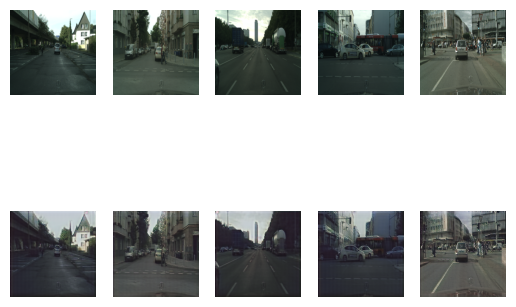

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

# Helper functions
def downsample(x, filters, activation, kernel_size=(3, 3), strides=(2, 2), padding="same"):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    return x

def residual_block(x, activation, kernel_size=(3, 3), padding="same"):
    y = x
    x = layers.Conv2D(filters=256, kernel_size=kernel_size, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)

    x = layers.Conv2D(filters=256, kernel_size=kernel_size, padding=padding)(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, y])
    x = activation(x)

    return x

def upsample(x, filters, activation, kernel_size=(3, 3), strides=(2, 2), padding="same"):
    x = layers.Conv2DTranspose(filters, kernel_size, strides=strides, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    return x

# Define the generator model using get_resnet_generator
def get_resnet_generator(
    input_shape=(256, 256, 3),
    filters=64,
    num_downsampling_blocks=2,
    num_residual_blocks=9,
    num_upsample_blocks=2,
    gamma_initializer='random_normal',
    name=None,
):
    img_input = layers.Input(shape=input_shape, name=(name + "_img_input") if name else None)
    x = layers.Conv2D(filters, (7, 7), kernel_initializer='he_normal', padding='same', use_bias=False)(img_input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Downsampling
    for _ in range(num_downsampling_blocks):
        filters *= 2
        x = downsample(x, filters=filters, activation=layers.Activation('relu'))

    # Residual blocks
    for _ in range(num_residual_blocks):
        x = residual_block(x, activation=layers.Activation('relu'))

    # Upsampling
    for _ in range(num_upsample_blocks):
        filters //= 2
        x = upsample(x, filters, activation=layers.Activation('relu'))

    # Final block
    x = layers.Conv2D(3, (7, 7), padding='same')(x)
    x = layers.Activation("tanh")(x)

    model = Model(img_input, x, name=name)
    return model

def build_generator(input_shape):
    return get_resnet_generator(input_shape=input_shape, name="generator")


# Define the discriminator model using get_discriminator
def get_discriminator(input_shape, filters=64, kernel_initializer='random_normal', num_downsampling=3, name=None):
    img_input = layers.Input(shape=input_shape, name=(name + "_img_input") if name else None)
    x = layers.Conv2D(filters, (4, 4), strides=(2, 2), padding="same", kernel_initializer=kernel_initializer)(img_input)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)  # Add dropout

    num_filters = filters
    for num_downsample_block in range(3):
        num_filters *= 2
        if num_downsample_block < 2:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(2, 2),
            )
        else:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(1, 1),
            )
        x = layers.Dropout(0.3)(x)  # Add dropout

    x = layers.Conv2D(1, (4, 4), strides=(1, 1), padding="same", kernel_initializer=kernel_initializer)(x)

    model = Model(inputs=img_input, outputs=x, name=name)
    return model

def adversarial_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def cycle_consistency_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def identity_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the CycleGAN model using get_resnet_generator and get_discriminator
class CycleGAN(tf.keras.Model):
    def __init__(
        self,
        generator_XY,
        generator_YX,
        discriminator_X,
        discriminator_Y,
        lambda_cycle=10.0,
        lambda_identity=0.5,
    ):
        super(CycleGAN, self).__init__()  # Fix here: use super().__init__()
        self.generator_XY = generator_XY
        self.generator_YX = generator_YX
        self.discriminator_X = discriminator_X
        self.discriminator_Y = discriminator_Y
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity
        
    def compile(
        self,
        gen_XY_optimizer,
        gen_YX_optimizer,
        disc_X_optimizer,
        disc_Y_optimizer,
    ):
        super(CycleGAN, self).compile()
        self.gen_XY_optimizer = gen_XY_optimizer
        self.gen_YX_optimizer = gen_YX_optimizer
        self.disc_X_optimizer = disc_X_optimizer
        self.disc_Y_optimizer = disc_Y_optimizer
        
    def train_step(self, batch_data):
        real_X, real_Y = batch_data[0], batch_data[1]

        # Forward pass
        with tf.GradientTape(persistent=True) as tape:
            # Generator XY forward pass
            fake_Y = self.generator_XY(real_X, training=True)
            # Generator YX forward pass
            fake_X = self.generator_YX(real_Y, training=True)

            # Identity mapping
            same_X = self.generator_YX(real_X, training=True)
            same_Y = self.generator_XY(real_Y, training=True)

            # Discriminator output
            disc_real_X = self.discriminator_X(real_X, training=True)
            disc_fake_X = self.discriminator_X(fake_X, training=True)

            disc_real_Y = self.discriminator_Y(real_Y, training=True)
            disc_fake_Y = self.discriminator_Y(fake_Y, training=True)

            # Generator adversarial loss
            gen_XY_loss = adversarial_loss(tf.ones_like(disc_fake_Y), disc_fake_Y)
            gen_YX_loss = adversarial_loss(tf.ones_like(disc_fake_X), disc_fake_X)

            # Generator cycle consistency loss
            cycle_loss_X = cycle_consistency_loss(real_X, fake_Y)
            cycle_loss_Y = cycle_consistency_loss(real_Y, fake_X)

            # Generator identity loss (optional)
            identity_loss_X = identity_loss(real_X,same_X)
            identity_loss_Y = identity_loss(real_Y, same_Y)

            # Total generator loss
            total_gen_loss = (
                gen_XY_loss
                + gen_YX_loss
                + self.lambda_cycle * (cycle_loss_X + cycle_loss_Y)
                + self.lambda_identity * (identity_loss_X + identity_loss_Y)
            )

            # Discriminator adversarial loss
            disc_X_loss = adversarial_loss(tf.ones_like(disc_real_X), disc_real_X) + adversarial_loss(
                tf.zeros_like(disc_fake_X), disc_fake_X
            )
            disc_Y_loss = adversarial_loss(tf.ones_like(disc_real_Y), disc_real_Y) + adversarial_loss(
                tf.zeros_like(disc_fake_Y), disc_fake_Y
            )

        # Calculate gradients
        gradients_gen_XY = tape.gradient(total_gen_loss, self.generator_XY.trainable_variables)
        gradients_gen_YX = tape.gradient(total_gen_loss, self.generator_YX.trainable_variables)
        gradients_disc_X = tape.gradient(disc_X_loss, self.discriminator_X.trainable_variables)
        gradients_disc_Y = tape.gradient(disc_Y_loss, self.discriminator_Y.trainable_variables)

        # Update weights
        self.gen_XY_optimizer.apply_gradients(zip(gradients_gen_XY, self.generator_XY.trainable_variables))
        self.gen_YX_optimizer.apply_gradients(zip(gradients_gen_YX, self.generator_YX.trainable_variables))
        self.disc_X_optimizer.apply_gradients(zip(gradients_disc_X, self.discriminator_X.trainable_variables))
        self.disc_Y_optimizer.apply_gradients(zip(gradients_disc_Y, self.discriminator_Y.trainable_variables))

        return {
            "gen_XY_loss": gen_XY_loss,
            "gen_YX_loss": gen_YX_loss,
            "cycle_loss_X": cycle_loss_X,
            "cycle_loss_Y": cycle_loss_Y,
            "identity_loss_X": identity_loss_X,
            "identity_loss_Y": identity_loss_Y,
            "disc_X_loss": disc_X_loss,
            "disc_Y_loss": disc_Y_loss,
        }

# Create the generator and discriminator instances
input_shape = (256, 256, 3)
generator_XY = build_generator(input_shape)
generator_YX = build_generator(input_shape)
discriminator_X = get_discriminator(input_shape)
discriminator_Y = get_discriminator(input_shape)

# Create the CycleGAN model
cycle_gan = CycleGAN(generator_XY, generator_YX, discriminator_X, discriminator_Y)

# Compile the model
cycle_gan.compile(
    gen_XY_optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    gen_YX_optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    disc_X_optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
    disc_Y_optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
)


def train_step(self, batch_data):
    real_X, real_Y = batch_data

    # Forward pass
    with tf.GradientTape(persistent=True) as tape:
        # Generator XY forward pass
        fake_Y = self.generator_XY(real_X, training=True)
        # Generator YX forward pass
        fake_X = self.generator_YX(real_Y, training=True)

        # Identity mapping
        same_X = self.generator_YX(real_X, training=True)
        same_Y = self.generator_XY(real_Y, training=True)

        # Discriminator output
        disc_real_X = self.discriminator_X(real_X, training=True)
        disc_fake_X = self.discriminator_X(fake_X, training=True)

        disc_real_Y = self.discriminator_Y(real_Y, training=True)
        disc_fake_Y = self.discriminator_Y(fake_Y, training=True)

        # Generator adversarial loss
        gen_XY_loss = adversarial_loss(tf.ones_like(disc_fake_Y), disc_fake_Y)
        gen_YX_loss = adversarial_loss(tf.ones_like(disc_fake_X), disc_fake_X)

        # Generator cycle consistency loss
        cycle_loss_X = cycle_consistency_loss(real_X, fake_Y)
        cycle_loss_Y = cycle_consistency_loss(real_Y, fake_X)

        # Generator identity loss (optional)
        identity_loss_X = identity_loss(real_X, same_X)
        identity_loss_Y = identity_loss(real_Y, same_Y)

        # Total generator loss
        total_gen_loss = (
            gen_XY_loss
            + gen_YX_loss
            + self.lambda_cycle * (cycle_loss_X + cycle_loss_Y)
            + self.lambda_identity * (identity_loss_X + identity_loss_Y)
        )

        # Discriminator adversarial loss
        disc_X_loss = adversarial_loss(tf.ones_like(disc_real_X), disc_real_X) + adversarial_loss(
            tf.zeros_like(disc_fake_X), disc_fake_X
        )
        disc_Y_loss = adversarial_loss(tf.ones_like(disc_real_Y), disc_real_Y) + adversarial_loss(
            tf.zeros_like(disc_fake_Y), disc_fake_Y
        )

    # Calculate gradients
    gradients_gen_XY = tape.gradient(total_gen_loss, self.generator_XY.trainable_variables)
    gradients_gen_YX = tape.gradient(total_gen_loss, self.generator_YX.trainable_variables)
    gradients_disc_X = tape.gradient(disc_X_loss, self.discriminator_X.trainable_variables)
    gradients_disc_Y = tape.gradient(disc_Y_loss, self.discriminator_Y.trainable_variables)

    # Update weights
    self.gen_XY_optimizer.apply_gradients(zip(gradients_gen_XY, self.generator_XY.trainable_variables))
    self.gen_YX_optimizer.apply_gradients(zip(gradients_gen_YX, self.generator_YX.trainable_variables))
    self.disc_X_optimizer.apply_gradients(zip(gradients_disc_X, self.discriminator_X.trainable_variables))
    self.disc_Y_optimizer.apply_gradients(zip(gradients_disc_Y, self.discriminator_Y.trainable_variables))

    return {
        "gen_XY_loss": gen_XY_loss,
        "gen_YX_loss": gen_YX_loss,
        "cycle_loss_X": cycle_loss_X,
        "cycle_loss_Y": cycle_loss_Y,
        "identity_loss_X": identity_loss_X,
        "identity_loss_Y": identity_loss_Y,
        "disc_X_loss": disc_X_loss,
        "disc_Y_loss": disc_Y_loss,
    }

# Set the number of training epochs
num_epochs = 8

# Set the batch size
batch_size = 1

# Create a dummy label array since you're doing unsupervised learning
dummy_labels = np.zeros(batch_size)

# Training loop
generated_image_paths = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Shuffle the datasets
    cityscape_images_train, gtav_images_train = shuffle(cityscape_images_train, gtav_images_train, random_state=42)

    # Iterate over batches
    for i in range(0, len(cityscape_images_train), batch_size):
        # Get a batch of data
        cityscape_batch = cityscape_images_train[i:i + batch_size]
        gtav_batch = gtav_images_train[i:i + batch_size]

        # Concatenate batches along the first axis (images)
        batch_data = [cityscape_batch, gtav_batch]

        # Perform a training step
        train_results = cycle_gan.train_step(batch_data)

        # Print some training information
    print(f"Batch {i + 1}/{len(cityscape_images_train)} - Gen XY Loss: {train_results['gen_XY_loss']}, Gen YX Loss: {train_results['gen_YX_loss']}, Disc X Loss: {train_results['disc_X_loss']}, Disc Y Loss: {train_results['disc_Y_loss']}")

# After training, you can generate images using the generator
generated_images = generator_XY.predict(cityscape_images_test)
generated_image_paths.extend(cityscape_test_files)

# Display a few generated images
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cityscape_images_test[i])
    plt.axis("off")
    plt.subplot(2, 5, i + 6)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.show()

32/32 [==============================] - 15s 477ms/step


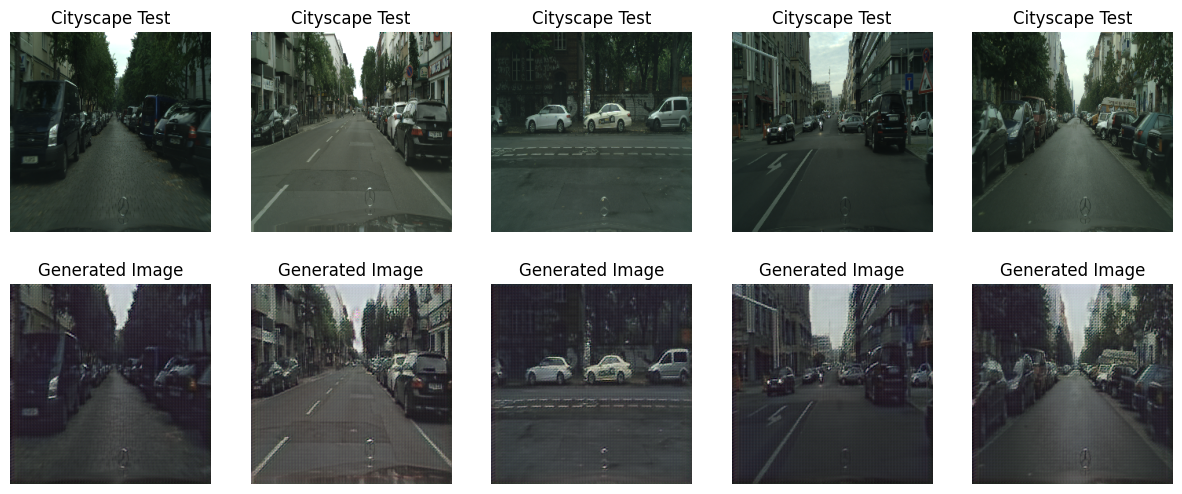

In [83]:
# After training, you can generate images using the generator
generated_images = generator_XY.predict(cityscape_images_test)
generated_image_paths.extend(cityscape_test_files)

# Display a different set of test and generated image pairs
start_index = 10  # Change the starting index

num_samples = 5
plt.figure(figsize=(15, 6))

for i in range(num_samples):
    # Display original Cityscape image
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(cityscape_images_test[i + start_index])
    plt.title("Cityscape Test")
    plt.axis("off")

    # Display generated image
    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(generated_images[i + start_index])
    plt.title("Generated Image")
    plt.axis("off")

plt.show()

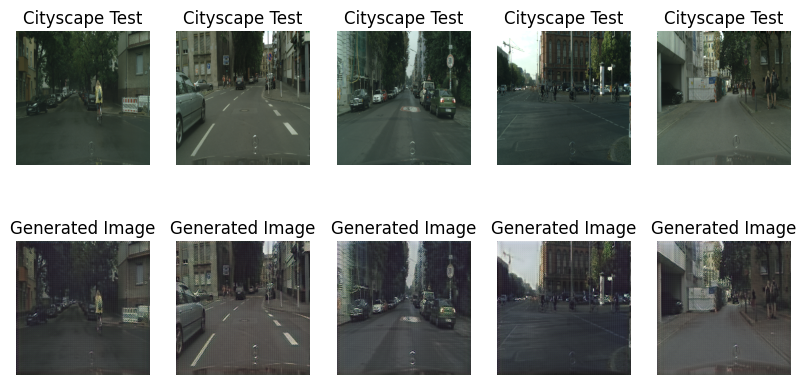

In [87]:
# Assuming you have a list of test image paths like cityscape_test_files
# ...

# Generate images using the trained generator
generated_images = []  # Initialize the list

test_images_used = []  # List to store test images used
start_index = 15

# Create a list to store the file paths of generated images
generated_image_paths = []

# Assuming you have a list of test image paths like cityscape_test_files
for i in range(start_index, len(cityscape_images_test), BATCH_SIZE):
    batch_data = (cityscape_images_test[i:i + BATCH_SIZE], gtav_images_test[i:i + BATCH_SIZE])
    test_files_batch = cityscape_test_files[i:i + BATCH_SIZE]

    real_X, real_Y = batch_data
    fake_Y = cycle_gan.generator_XY(real_X, training=False)
    generated_images.append(fake_Y)  # Fix the indentation
    test_images_used.extend(test_files_batch)

    # Assuming you have a list of test image paths like cityscape_test_files
    generated_image_paths.extend(cityscape_test_files[i:i + BATCH_SIZE])

# Concatenate the generated images
generated_images = np.concatenate(generated_images, axis=0)

# Visualize the original and generated images
num_samples = 5
plt.figure(figsize=(10, 5))

for i in range(num_samples):
    # Display original Cityscape image
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(cityscape_images_test[i + start_index])
    plt.title("Cityscape Test")
    plt.axis("off")

    # Display generated image
    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.imshow(generated_images[i])
    plt.title("Generated Image")
    plt.axis("off")

plt.show()

In [90]:
import os
import numpy as np
import cv2
import shutil

# Specify the output directory
output_directory = "/kaggle/working/generated_images"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

for i, image in enumerate(generated_images):
    # Choose an appropriate file format based on your requirements (e.g., PNG or JPEG)
    file_path = os.path.join(output_directory, f'generated_image_{i}.png')

    # Map the pixel values to [0, 255] using min-max scaling
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (255.0 / (max_val - min_val) * (image - min_val)).astype(np.uint8)

    # Save the image using OpenCV
    cv2.imwrite(file_path, cv2.cvtColor(normalized_image, cv2.COLOR_RGB2BGR))

# Create a zip file using shutil.make_archive
zip_file_path = shutil.make_archive(output_directory, 'zip', output_directory)

print(f"Generated images saved in: {output_directory}")
print(f"Zip file created at: {zip_file_path}")

Generated images saved in: /kaggle/working/generated_images
Zip file created at: /kaggle/working/generated_images.zip


In [93]:
import os
import zipfile

# Specify the folder path you want to zip
folder_path = "/kaggle/input/cityscapes/Cityscape/leftImg8bit/test"

# Specify the output directory
output_directory = "/kaggle/working"

# Specify the name of the zip file
zip_file_name = "test_images.zip"

# List all files in the folder
file_paths = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_paths.append(os.path.join(root, file))

# Create a zip file containing the contents of the folder
with zipfile.ZipFile(os.path.join(output_directory, zip_file_name), 'w') as zipf:
    for file_path in file_paths:
        zipf.write(file_path, os.path.relpath(file_path, folder_path))

print(f"Zip file created at: {os.path.join(output_directory, zip_file_name)}")

Zip file created at: /kaggle/working/test_images.zip
